In [3]:
import numpy as np
from scipy.interpolate import interp1d, barycentric_interpolate
from scipy.optimize import curve_fit
import pylab

# Question 1
### 1a)

In [2]:
#define the two sets of values with arrays
x = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
y = np.array([6.008, 15.722, 27.130, 33.772, 5.257, 9.549, 11.098, 28.828])

In [3]:
#define the the equations of a straight and curved (quadratic) line
def func(x, a, b):
    return a*x + b

def fe(x,d,e,f):
    return d*(x**2)+e*x+f

In [4]:
#use the curve fit function to derive best fit values for the coefficients of each fit function.
popt1, pcov1 = curve_fit(func, x, y)
popt2, pcov2 = curve_fit(fe, x, y)

#generate 50 evenly spaced x values between 1 and 4
xn=np.linspace(1,4,50)

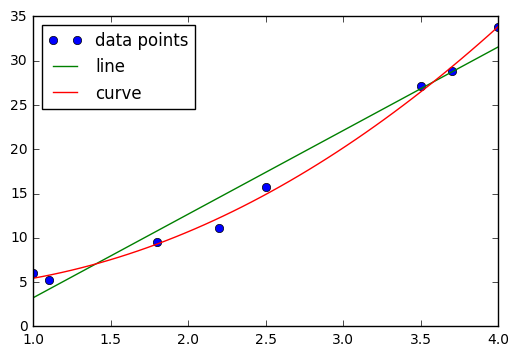

In [5]:
#plot.
pylab.plot(x,y, 'o', label='data points')
pylab.plot(xn,popt1[0]*xn+popt1[1],label='line')
pylab.plot(xn,popt2[0]*(xn**2)+popt2[1]*xn+popt2[2],label='curve')
pylab.legend(loc='best')
pylab.show()

In [6]:
#this just calcuates the standard deviations away from the fit for each function.
s1=0
yfx1 = (popt1[0]*x+popt1[1])
s1 = sum((y - yfx1)**2)
sd1 = (abs(s1/(2-len(x))))**0.5

s2=0
yfx2 = (popt2[0]*(x**2)+popt2[1]*x+popt2[2])
s2 = sum((y - yfx2)**2)
sd2 = (abs(s2/(2-len(x))))**0.5

print sd1
print sd2

2.24356382796
0.74209830316


Standard deviation of the quadratic fit is less therefore, this is a better fit.

### 1b)

In [7]:
#generate arrays of the two sets of values.
x1 = np.array([0.5,1.0,1.5,2.0,2.5])
y1=([0.541,0.398,0.232,0.106,0.052])

In [8]:
#define the function.
def fenc(x1,a,b):
    return a*x1*np.exp(b*x1)

In [9]:
#curve fit solve again and print the coefficients.
popt3, pcov3 = curve_fit(fenc, x1, y1)

print popt3[0],popt3[1]

2.90177776864 -1.97656791358


In [10]:
#standard deviations again
s2=0
yfx2 = popt3[0]*x1+np.exp(popt3[1]*x1)
s2 = sum((y1 - yfx2)**2)
sd2 = (abs(s2/(2-len(x))))**0.5
print sd2

4.29520272223


### 1c)

In [11]:
#cd1=(2*Fd)/(r*(u**2)*A)
#generate arrays of the values.
Re=np.array([0.2,2,20,200,2000,20000])
Cd=np.array([103,13.9,2.72,0.800,0.401,0.433])

#define their logs as Rel and Cdl
Rel=np.log(Re)
Cdl=np.log(Cd)

In [12]:
#generate a set of values between the min and max values of the data set Rel.
#interpolate the values to be plotted on the x and y axis.
#define functions for linear and cubic splines.
x3 = np.linspace(min(Rel),max(Rel))
y3 = barycentric_interpolate(Rel, Cdl, x3) #polynomial fit
f_linear = interp1d(x3,y3) #linear spline fit
f_cubic1 = interp1d(Rel,Cdl, kind='cubic') #cubic spline fit

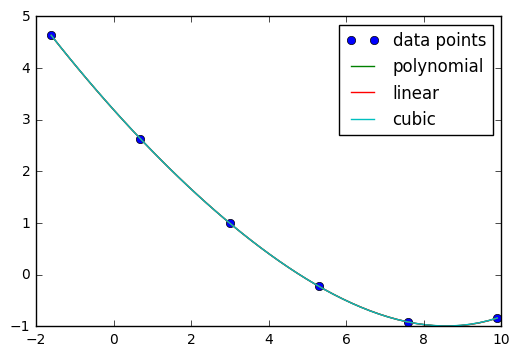

In [13]:
#plot.
pylab.plot(Rel,Cdl, 'o', label='data points')
pylab.plot(x3, y3, label='polynomial')
pylab.plot(x3,f_linear(x3), label='linear')
pylab.plot(x3,f_cubic1(x3), label='cubic')
pylab.legend(loc='best')
pylab.show()

In [14]:
#print values of Cd at each point for each value method of fitting.
a = 10**f_cubic1(np.log(5))
b = 10**f_cubic1(np.log(50))
c = 10**f_cubic1(np.log(500))
d = 10**f_cubic1(np.log(5000))
e = 10**f_linear(np.log(5))
f = 10**f_linear(np.log(50))
g = 10**f_linear(np.log(500))
h = 10**f_linear(np.log(5000))

print a, b, c, d
print e, f, g, h

86.560557839 2.88455196189 0.267142992896 0.102274279813
86.780149978 2.88798512777 0.268145246718 0.101882564905


# Question 2

In [15]:
#define 11 equally spaced set of values between -pi & pi for x.
x = np.linspace(-np.pi,np.pi, 11)

In [16]:
#define the function to be used.
def f(x):
    y = ([])
    for n in x:
        if n<0:
            y.append(-1)
        if n>=0:
            y.append(1)
    return y

In [17]:
#to interpolate the points, begin by generating many (1000) points in the range -pi & pi.
#interpolate the the point giving the x values, the y values and the 1000 generate values.
#the last line is for part (b) to find the cubic spline fit of the x and y values.
xi = np.linspace(-np.pi,np.pi, 1000)
yi = barycentric_interpolate(x, f(x), xi)
f_cubic2 = interp1d(x,f(x), kind='cubic')

In [18]:
#set up an array of the three values to be evaluated on the fit.
#find the actual y values according to the function named 'xa_true'
#interpolate the values in the same way as before but with the generated values 'xa' to find the values given from the interpolation method.
#use the cubic spline function from before to find the values using this method.
xa = ([-1.5,1,3])
xa_true = f(xa)
xa_bi = barycentric_interpolate(x, f(x), xa)
xa_cubic = f_cubic2(xa)

x= [-1.5, 1, 3]
True Values [-1, 1, 1]
Interpolated Values [-0.55878995  0.78467732  6.21284005]
Interpolated Errors [ 0.44121005  0.21532268  5.21284005]
There 11 points in the fit therefore it is a 10th order polynomial
Cubic Values [-0.93929221  0.95312773  1.016033  ]
Cubic Errors [ 0.06070779  0.04687227  0.016033  ]


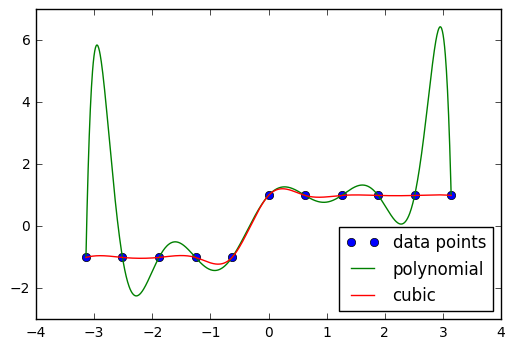

In [19]:
#print the value found and compare them with the true values by finding the decimal error.
print 'x=', xa
print 'True Values', xa_true
print 'Interpolated Values', xa_bi
print 'Interpolated Errors', abs((xa_true-xa_bi) / xa_true)
print 'There 11 points in the fit therefore it is a 10th order polynomial'
print 'Cubic Values', xa_cubic
print 'Cubic Errors', abs((xa_true-xa_cubic) / xa_true)

pylab.plot(x,f(x), 'o', label='data points')
pylab.plot(xi, yi, label='polynomial')
pylab.plot(xi, f_cubic2(xi), label='cubic')
pylab.legend(loc='best')
pylab.show()

In [20]:
#define the hyperbolic function in (d)
def func(x, a, b, c):
    return a*np.tanh(b*x+c)

In [21]:
#generate noise according to the given function which generates y values slightly higher lower than the true values.
yn = f(x) + 0.1*np.random.random(len(x))

In [22]:
#find the curve fit of the function for both the true values and the noisey values.
popt1, pcov1 = curve_fit(func, x, f(x))
popt2, pcov2 = curve_fit(func, x, yn)

C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [23]:
#print the coefficients found from both fits.
print '(a,b,c)=', popt1[0], popt1[1], popt1[2]
print '(a,b,c) w/ noise=', popt2[0], popt2[1], popt2[2]

(a,b,c)= 1.00000000001 38.4713125862 11.9717512914
(a,b,c) w/ noise= 1.02281674269 27.0877733329 14.7863166001


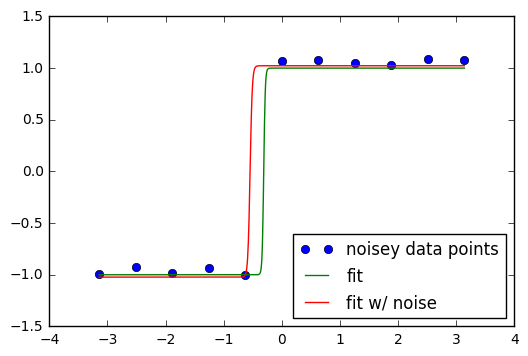

In [24]:
#plot all values from this question.
pylab.plot(x,yn, 'o', label='noisey data points')
pylab.plot(xi,popt1[0]*np.tanh(popt1[1]*xi+popt1[2]),label='fit')
pylab.plot(xi,popt2[0]*np.tanh(popt2[1]*xi+popt2[2]),label='fit w/ noise')
pylab.legend(loc='best')
pylab.show()

The parameters a,b,c are reduced for the fit with noise introduced on the data points.
Introducing noise into the values on the y axis gives a smoother fit between the two halves of the set of values.

# Past Paper Question 2013-14

In [4]:
#define the arrays
h = np.array([0.,1.525,3.050,4.575,6.10,7.625,9.150])
p = np.array([1.,0.8617,0.7385,0.6292,0.5328,0.4481,0.3741])

In [5]:
#generate values for x to be plotted
#interpolate the values to give a polynomial fit
#find the cubic splines using interp1d
x = np.linspace(min(h),max(h))
y = barycentric_interpolate(h, p, x) #polynomial fit
f_cubic = interp1d(h,p, kind='cubic') #cubic spline fit

In [7]:
pylab.plot(h,p, 'o', label='data points')
pylab.plot(x, y, label='polynomial')
pylab.plot(x,f_cubic(x), label='cubic')
pylab.legend(loc='best')
pylab.show()

In [8]:
#runs the interpolate and interp1d functions for each value
h2_poly = barycentric_interpolate(h, p, 2)
h4_poly = barycentric_interpolate(h, p, 4)
h8_poly = barycentric_interpolate(h, p, 8)
h2_cub = f_cubic(2)
h4_cub = f_cubic(4)
h8_cub = f_cubic(8)

In [9]:
print 'values for a)', h2_poly, h4_poly, h8_poly
print 'values for b)', h2_cub, h4_cub, h8_cub

values for a) 0.821776765804 0.668838720134 0.428931828448
values for b) 0.821767808776 0.668840822907 0.428944803738


In [10]:
#calculate the relative errors.
print 'relative percentage errors'
print 'h=2 ->', abs((h2_poly/h2_cub)-1)*100
print 'h=4 ->', abs((h4_poly/h4_cub)-1)*100
print 'h=8 ->', abs((h8_poly/h8_cub)-1)*100

relative percentage errors
h=2 -> 0.00108997062658
h=4 -> 0.000314390703315
h=8 -> 0.00302493218105


In [11]:
#caluclate the absolute errors.
h4 = 0.67

print 'absolute percentage errors'
print 'poly error ->', abs((h4_poly/h4)-1)*100
print 'cubic', abs((h4_cub/h4)-1)*100

absolute percentage errors
poly error -> 0.173325353159
cubic 0.173011506388
